In [2]:
#last inn numpy og  matplotlib
import numpy as np
import matplotlib.pyplot as plt

variables = {"figure.figsize" : (10,10)}
plt.rcParams.update(variables)

In [3]:
N = 81
d = 0.5
iter_maks = 1000

r = ((2-d)/2)
x_pos = int(N * r / 2)
y_pos = 0.25*(N-1)

In [4]:
def Gauss_Seidel(V_0 , N , iter_maks):
    """Gauss Seidel løsning potensialet innenfor boksen med en avstand 0.5 mellom platene.
    Input:
              V_0: Start matrise som blir iterert over
                N: Størrelse på matrisen (N,N)
        iter_maks: Maksimalt antall iterasjoner
    Output:
           V: Den itererte matrisen
        iter: Antall iterasjoner"""
    def Gauss_iterasjon(V_0 , N):
        """Gauss Seidel iterasjoner, tar inn samme variabler som Gauss_Seidel"""
        for i in range(1,N-1):
            for j in range(1,N-1):
                if( abs(V[i,j]) == 1):
                    pass
                else:
                    V[i,j] = 0.25*(V[i-1,j] + V[i+1,j] + V[i,j+1] + V[i,j-1])
        return V
    V = V_0 
    iter = 0
    while iter < iter_maks:
        V = Gauss_iterasjon(V,N)
        iter += 1
    return V , iter

In [5]:
def SOR_step(V_k, N, omega):  #Kopiert fra LF numerisk øving 2
    #Copy the old matrix
    V_new = np.copy(V_k)
    #Calculate 1-omega once instead of every time
    prefac = 1.0-omega
    
    #We want to itterate over every x-value except the boundaries (x=0,N-1)
    for i in np.arange(1,N-1):
        #We need to treat the top and the bottom rows as special cases because of the periodic boundary
        #conditions. Top row:
        V_new[0,i] = prefac*V_new[0,i] + (V_new[0,i-1] + V_new[0,i+1] + V_new[N-1,i] + V_new[1,i])*omega / 4.0
        
        #We can loop over the middle rows
        for j in np.arange(1,N-1):
            V_new[j,i] = prefac*V_new[j,i] + (V_new[j,i-1] + V_new[j,i+1] + V_new[j-1,i] + V_new[j+1,i])*omega / 4.0
        
        #Bottom row:
        V_new[N-1,i] = prefac*V_new[N-1,i] + (V_new[N-1,i-1] + V_new[N-1,i+1] + V_new[N-2,i] + V_new[0,i])*omega / 4.0
    
    return V_new
    
    
def SOR(V_0, N, omega, maks_iter):
    #Start by recording the start time
    #We now need a counter and two arrays to save the old and new version of V_k
    V_old = V_0
    V_new = np.copy(V_old)
    steps = 0
    
    #Now we make a while loop where V_k is updated by using Jacobi-step until the numerical
    #requirement for convergence is satisfied
    while (steps < maks_iter):
        V_old = np.copy(V_new)
        V_new = SOR_step(V_old, N, omega)
        steps += 1
    
    #Record the end-time

    
    return V_new, steps

In [6]:
V_start = np.zeros((N,N))

V_start[int(y_pos):(3*int(y_pos))+1 ,x_pos] = -1
V_start[int(y_pos):(3*int(y_pos))+1 ,-x_pos] = 1

X_val = np.linspace(-1,1,N)
Y_val = np.linspace(-1,1,N)

xv , yv = np.meshgrid(X_val,Y_val)

In [7]:
V , iter = Gauss_Seidel(V_start,N,iter_maks)

In [8]:
Vs , its = SOR(V_start , N, pow(10,-4) , iter_maks)
"""Prøvd meg fram med forskjellige omega verdier, ingen (jeg har testet) av dem gir en god løsning."""

'Prøvd meg fram med forskjellige omega verdier'

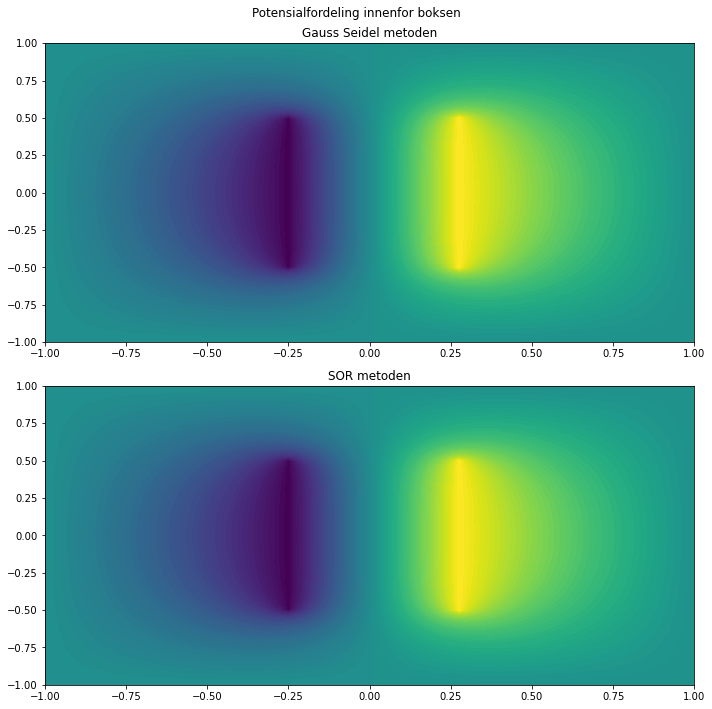

Antall iterasjoner:  1000
Dette plottet viser fordelingen av potensialet innenfor den gitte boksen.
Både med Gauss Seidel metoden og med SOR metoden


In [9]:
fig , ax = plt.subplots(2 , figsize = (10,10))
fig.suptitle("Potensialfordeling innenfor boksen")
ax[0].contourf(xv,yv,V,N)
ax[0].set_title("Gauss Seidel metoden")
ax[1].contourf(xv,yv,Vs , N)
ax[1].set_title("SOR metoden")

plt.tight_layout()
plt.show()

print("Antall iterasjoner: ", iter)
print(f"""Dette plottet viser fordelingen av potensialet innenfor den gitte boksen.
Både med Gauss Seidel metoden og med SOR metoden""")

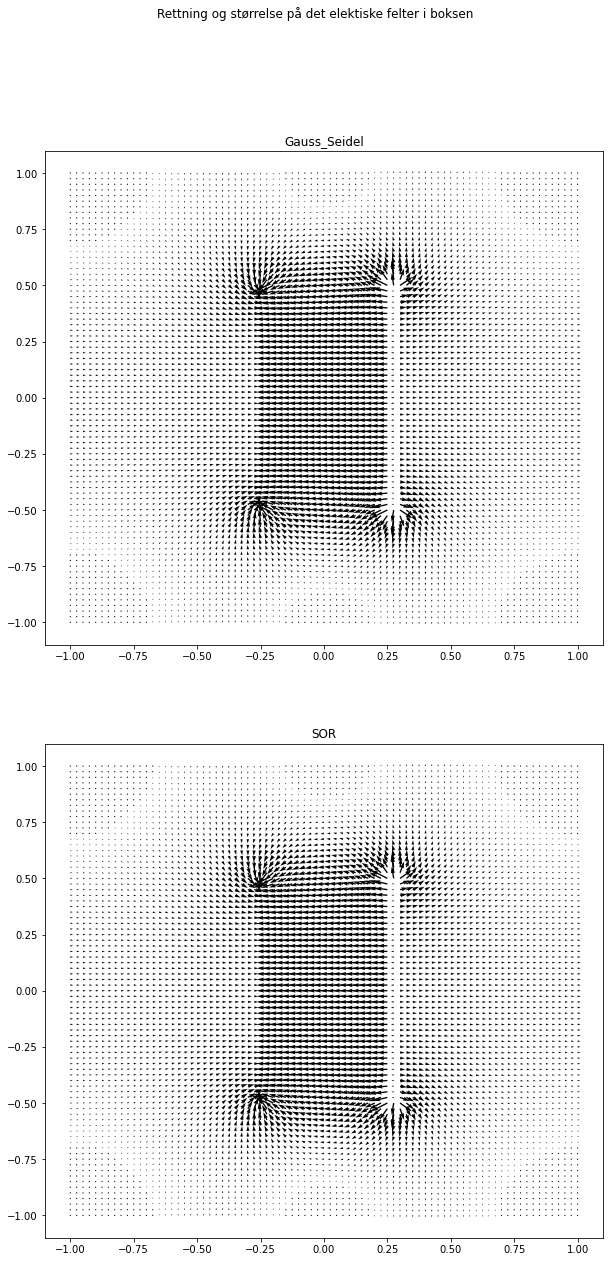

Større piler bettyr sterkere felt. 
 Merk at mellom de to platene i +- 0.25 er feltet tilnærmet homogent.


In [16]:
ElektiskFelt_gs = np.array(np.gradient(-V))
ElektiskFelt_sor = np.array(np.gradient(-Vs))

fig , ax = plt.subplots(2, figsize = (10 ,20))
fig.suptitle("Rettning og størrelse på det elektiske felter i boksen")
ax[0].quiver(xv,yv,ElektiskFelt_gs[1],ElektiskFelt_gs[0])
ax[1].quiver(xv,yv,ElektiskFelt_sor[1],ElektiskFelt_sor[0])

ax[0].set_title("Gauss_Seidel")
ax[1].set_title("SOR")

plt.show()
print("Større piler bettyr sterkere felt. \n Merk at mellom de to platene i +- 0.25 er feltet tilnærmet homogent.")

In [11]:
def ElektiskFeltStyrke(d):
    r = ((2-d)/2)
    x_pos = int(N * r / 2)
    y_pos = 0.25*(N-1)
   
    V_start = np.zeros((N,N))
    V_start[int(y_pos):(3*int(y_pos))+1 ,x_pos] = 1
    V_start[int(y_pos):(3*int(y_pos))+1 ,-x_pos] = -1
    V , iter = Gauss_Seidel(V_start,N,100)
    ElektiskFelt = np.array(np.gradient(-V))
    
    y = int(N*1.6 / 2)
    x = int((N-1)/2 + 1)

    return np.sqrt((ElektiskFelt[0][y,x])**2 + (ElektiskFelt[1][y,x])**2)

d_verdier = np.linspace(0,1,22)
E_verdier = np.zeros(len(d_verdier))

for i in range(len(d_verdier)):
    E_verdier[i] = ElektiskFeltStyrke(d_verdier[i]) 


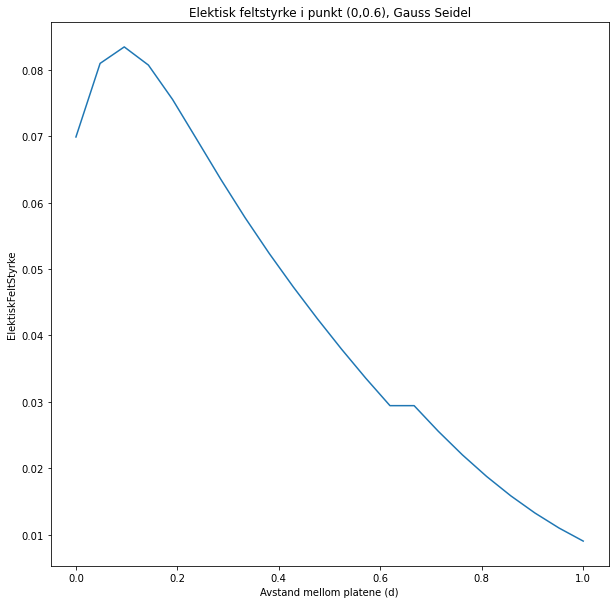

Grafen over viser den elektriske feltstyrken i oppgitt punkt med varierende plateseperasjon d.
I dette plottet er SOR metoden ikke tatt med siden funksonen ikke enkelt lar seg iterere over.


In [12]:
plt.figure()
plt.plot(d_verdier,E_verdier)
plt.title("Elektisk feltstyrke i punkt (0,0.6), Gauss Seidel")
plt.xlabel("Avstand mellom platene (d)")
plt.ylabel("ElektiskFeltStyrke")
plt.show()
print("""Grafen over viser den elektriske feltstyrken i oppgitt punkt med varierende plateseperasjon d.
I dette plottet er SOR metoden ikke tatt med siden funksonen ikke enkelt lar seg iterere over.""")